In [1]:
from functions.get_kaggle_data import *
from functions.import_to_df import *
from functions.process_data import *

In [6]:
import pandas as pd 
import pandas_profiling as pdp
import numpy as np
import pprint as pp
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
files = get_kaggle_data(
    competition="commonlitreadabilityprize"
    )

files downloaded for commonlitreadabilityprize competition
   test.csv
   train.csv
   sample_submission.csv
located in /competition_data/


In [3]:
input_data = import_to_df(files)

In [4]:
input_data.keys()

dict_keys(['test', 'train', 'sample_submission'])

In [5]:
train_df = input_data['train']

In [7]:
profile = pdp.ProfileReport(train_df)
profile.to_file(output_file='PandasProfileTrain.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 429.57it/s]


In [8]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


Dont need legal or licence stuff - not relevant and not in test data.  
Excerpt and target only for training.  
Error of previous ratings to be used for understanding data not for training. 

Lets check out error vs target.  


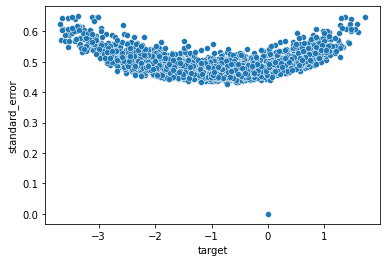

In [11]:
ax = sns.scatterplot(y="standard_error", x="target", data=train_df)

Wow. Error increases as diverge from -1 target.  
Hopefully my predictions will fall in middle of curve?